# 程式 A.1： 梯度下降

In [ ]:
import numpy as np

def f(x): #原始函數
  return np.log(np.power(x,4) + np.power(x,3) + 2)

def dfdx(x): #導數函數
  return (4*np.power(x,3) + 3*np.power(x,2)) / f(x)

x = -9.41 #隨機選取的起始點
lr = 0.001 #學習率（即步伐參數）
epochs = 5000 #迭代次數
for i in range(epochs):
  deriv = dfdx(x) #計算當前資料點上的導數
  x = x - lr * deriv #更新資料點
print(x)

-0.7500000134493898


# 程式 A.2： 一個簡單的神經網路

In [ ]:
def nn(x,w1,w2): #定義一個簡單的雙層神經網路
  l1 = x @ w1 #矩陣乘法
  l1 = np.maximum(0,l1) #非線性激活函數
  l2 = l1 @ w2
  l2 = np.maximum(0,l2)
  return l2

w1 = np.random.randn(784,200) #隨機產生參數矩陣及輸入向量
w2 = np.random.randn(200,10)
x = np.random.randn(784) 
nn(x,w1,w2) #運行神經網路

array([638.9121276 ,   0.        , 254.16209991,  59.36633227,
         0.        , 117.66354319,   0.        , 568.49685739,
       513.18205742,   0.        ])

# 程式 A.3： PyTorch神經網路

In [ ]:
import torch

def nn(x,w1,w2):
  l1 = x @ w1 #矩陣乘法
  l1 = torch.relu(l1) #非線性激活函數
  l2 = l1 @ w2
  return l2

w1 = torch.randn(784,200,requires_grad=True) #包含梯度記錄的權重（參數）矩陣
w2 = torch.randn(200,10,requires_grad=True)
x = torch.randn(784) #隨機輸入向量
nn(x,w1,w2) 

tensor([ -18.0930, -102.1785, -231.5940,   -6.5188,   18.9307,  302.6000,
         -88.6396,  -75.5171, -245.2212,  282.3608],
       grad_fn=<SqueezeBackward3>)

# 程式 A.4： 使用神經網路分類MNIST圖片

In [ ]:
import torchvision as TV

# 為了解決請求MNIST數據時出現403錯誤的問題
from six.moves import urllib 
opener = urllib.request.build_opener()
opener.addheaders = [('User', 'Google_Chrome')]
urllib.request.install_opener(opener)
###

mnist_data = TV.datasets.MNIST("MNIST", train=True, download=True) #下載並匯入MNIST資料集
lr = 0.0001
epochs = 2500
batch_size = 1000
losses = []
lossfn = torch.nn.CrossEntropyLoss() #建立損失函數
for i in range(epochs):
  rid = np.random.randint(0,mnist_data.train_data.shape[0],size=batch_size) #隨機產生一系列索引值
  x = mnist_data.train_data[rid].float().flatten(start_dim=1) #產生訓練資料子集，並將原本28×28的圖片扁平化成長度784的向量
  x /= x.max() #將向量值正規化至0到1之間
  pred = nn(x,w1,w2) #利用神經網路產生預測結果
  target = mnist_data.train_labels[rid] #取得對應圖片的正確標籤
  loss = lossfn(pred, target)#計算損失
  losses.append(loss)
  loss.backward() #反向傳播
  with torch.no_grad(): #不要計算此區塊的梯度
    w1 -= lr * w1.grad #對參數矩陣執行梯度下降
    w2 -= lr * w2.grad

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


##產生圖A.2之程式碼

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


(-0.5, 27.5, 27.5, -0.5)

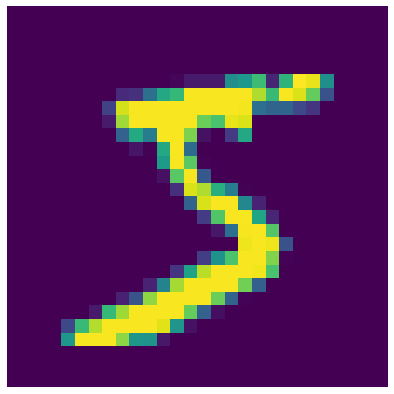

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,7))
plt.imshow(mnist_data.train_data[0])
plt.axis('off')

##產生圖A.3之程式碼

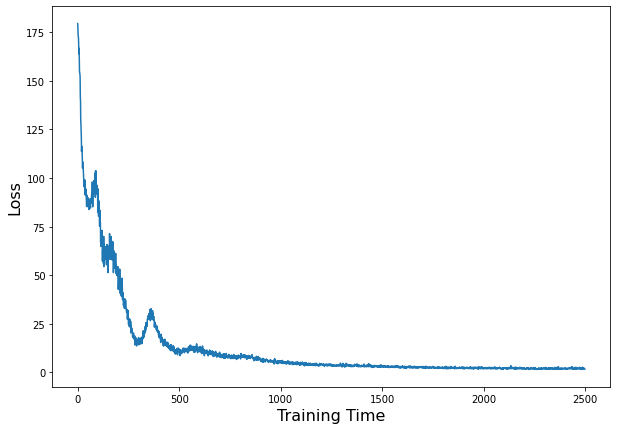

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel("Training Time", fontsize=16)
plt.ylabel("Loss", fontsize=16)
plt.plot(losses)

##重建神經網路模型

In [ ]:
w1 = torch.randn(784,200,requires_grad=True) #包含梯度記錄的權重（參數）矩陣
w2 = torch.randn(200,10,requires_grad=True)
def nn(x,w1,w2): #重新初始化神經網路
  l1 = x @ w1 #矩陣乘法
  l1 = torch.relu(l1) #非線性激活函數
  l2 = l1 @ w2
  return l2

# 程式 A.5：使用Adam優化器

In [ ]:
mnist_data = TV.datasets.MNIST("MNIST", train=True, download=False)

lr = 0.001
epochs = 5000
batch_size = 500
losses = []
lossfn = torch.nn.CrossEntropyLoss() #建立損失函數
optim = torch.optim.Adam(params=[w1,w2],lr=lr) #建立ADAM優化器
for i in range(epochs):
  rid = np.random.randint(0,mnist_data.train_data.shape[0],size=batch_size) 
  x = mnist_data.train_data[rid].float().flatten(start_dim=1)
  x /= x.max()
  pred = nn(x,w1,w2)
  target = mnist_data.train_labels[rid]
  loss = lossfn(pred,target)
  losses.append(loss)
  loss.backward() #反向傳播
  optim.step() #更新參數

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


##產生圖A.4之程式碼

In [ ]:
plt.figure(figsize=(10,7))
plt.xlabel("Training Time", fontsize=22)
plt.ylabel("Loss", fontsize=22)
plt.plot(losses)

In [ ]:
# total = 0
# for i in range(pred.shape[0]):
#   prediction = pred[i].argmax()
#   count = int(prediction == target[i])
#   total += count
# print(total)
# acc = total/pred.shape[0]
# print(acc)